In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from matplotlib.colors import SymLogNorm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [179]:
# Load the dataset
df = pd.read_csv('dataset-age_1.csv')


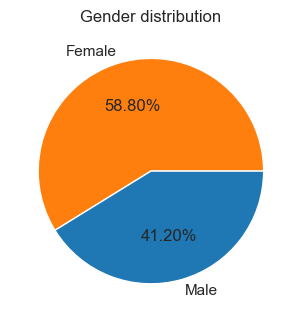

<Figure size 800x400 with 0 Axes>

In [180]:
plt.subplot(1, 2, 1)
colors = ["#ff7f0e", "#1f77b4"]

plt.pie(df["gender"].value_counts(), labels=["Female", "Male"], colors=colors,  autopct='%.2f%%')

plt.title("Gender distribution")

plt.show()


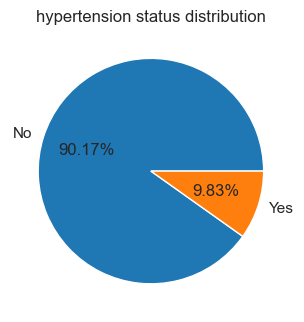

In [161]:
plt.subplot(1, 2, 1)
colors = ["#1f77b4","#ff7f0e"]

plt.pie(df["hypertension"].value_counts(), labels=["No","Yes"], colors=colors,  autopct='%.2f%%')
plt.title("hypertension status distribution")
plt.show()

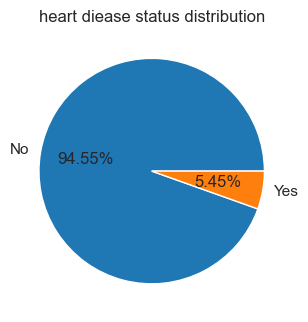

In [162]:
plt.subplot(1, 2, 1)
colors = ["#1f77b4","#ff7f0e"]

plt.pie(df["heart_disease"].value_counts(), labels=["No","Yes"], colors=colors,  autopct='%.2f%%')
plt.title("heart diease status distribution")
plt.show()

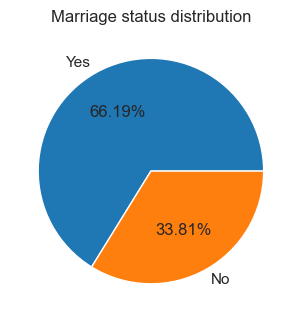

In [163]:
plt.subplot(1, 2, 1)
colors = ["#1f77b4","#ff7f0e"]

plt.pie(df["ever_married"].value_counts(), labels=["Yes", "No"], colors=colors,  autopct='%.2f%%')
plt.title("Marriage status distribution")
plt.show()

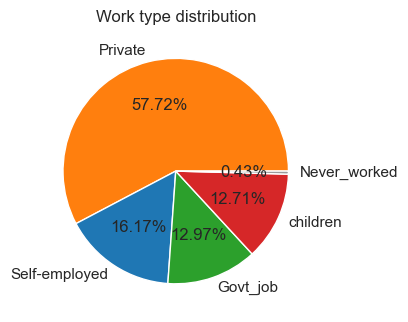

In [164]:
plt.subplot(1, 2, 1)
colors = ["#ff7f0e", "#1f77b4","#2ca02c","#d62728","#9c9a9a"]

plt.pie(df["work_type"].value_counts(), labels=["Private", "Self-employed","Govt_job","children","Never_worked"], colors=colors,  autopct='%.2f%%')
plt.title("Work type distribution")
plt.show()

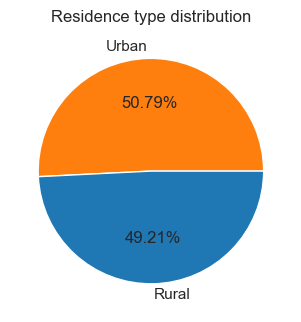

In [165]:
plt.subplot(1, 2, 1)
colors = ["#ff7f0e", "#1f77b4"]

plt.pie(df["Residence_type"].value_counts(), labels=["Urban","Rural"], colors=colors,  autopct='%.2f%%')
plt.title("Residence type distribution")
plt.show()

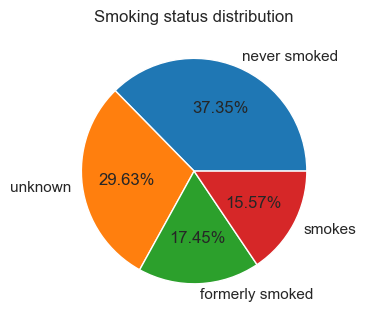

In [166]:
plt.subplot(1, 2, 1)
colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728"]

plt.pie(df["smoking_status"].value_counts(), labels=["never smoked","unknown","formerly smoked","smokes"], colors=colors,  autopct='%.2f%%')
plt.title("Smoking status distribution")
plt.show()

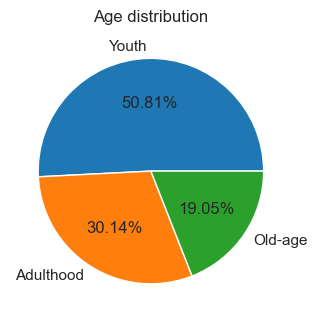

In [167]:

df['age_range'] = pd.cut(df['age'], bins=[0, 45, 65, np.Inf], labels=["Youth (0-45)", "Adulthood (46-65)", "Old Age (66+)"])
plt.subplot(1, 2, 1)
colors = ["#1f77b4","#ff7f0e","#2ca02c"]

plt.pie(df["age_range"].value_counts(), labels=["Youth","Adulthood","Old-age"], colors=colors,  autopct='%.2f%%')
plt.title("Age distribution")
plt.show()

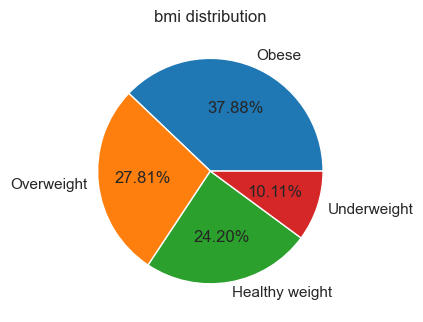

In [168]:
df['bmi_range'] = pd.cut(df['bmi'], bins=[-1, 18.4, 24.9, 29.9, np.Inf], labels=["Underweight", "Healthy Weight", "Overweight", "Obese"])
plt.subplot(1, 2, 1)
colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728"]

plt.pie(df["bmi_range"].value_counts(), labels=["Obese", "Overweight", "Healthy weight", "Underweight"], colors=colors,  autopct='%.2f%%')
plt.title("bmi distribution")
plt.show()

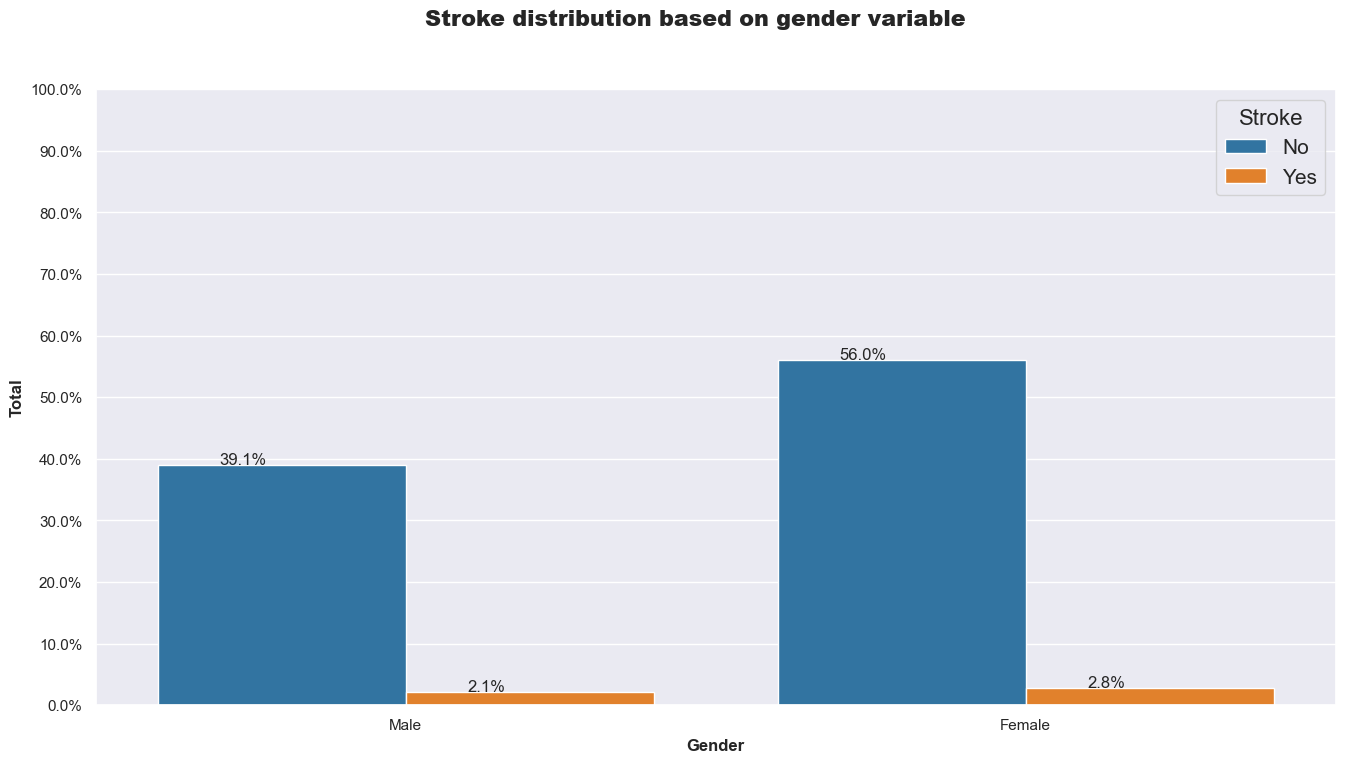

In [169]:
plt.figure(figsize=(16,8))

    ## Figure title
plt.suptitle("Stroke distribution based on gender variable", fontweight='heavy',fontsize='16', fontfamily='sans-serif')

    ## Count plot
ax=sns.countplot(data = df, x = "gender", hue = "stroke", palette = colors)
plt.xlabel("Gender", fontfamily='sans-serif', fontweight='bold')
plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
plt.xticks([0, 1],["Male","Female"])
plt.legend(title = "Stroke", labels= ["No","Yes"], fontsize='15',title_fontsize='16', frameon=True)
total = len(df)*1.
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))


#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.show()

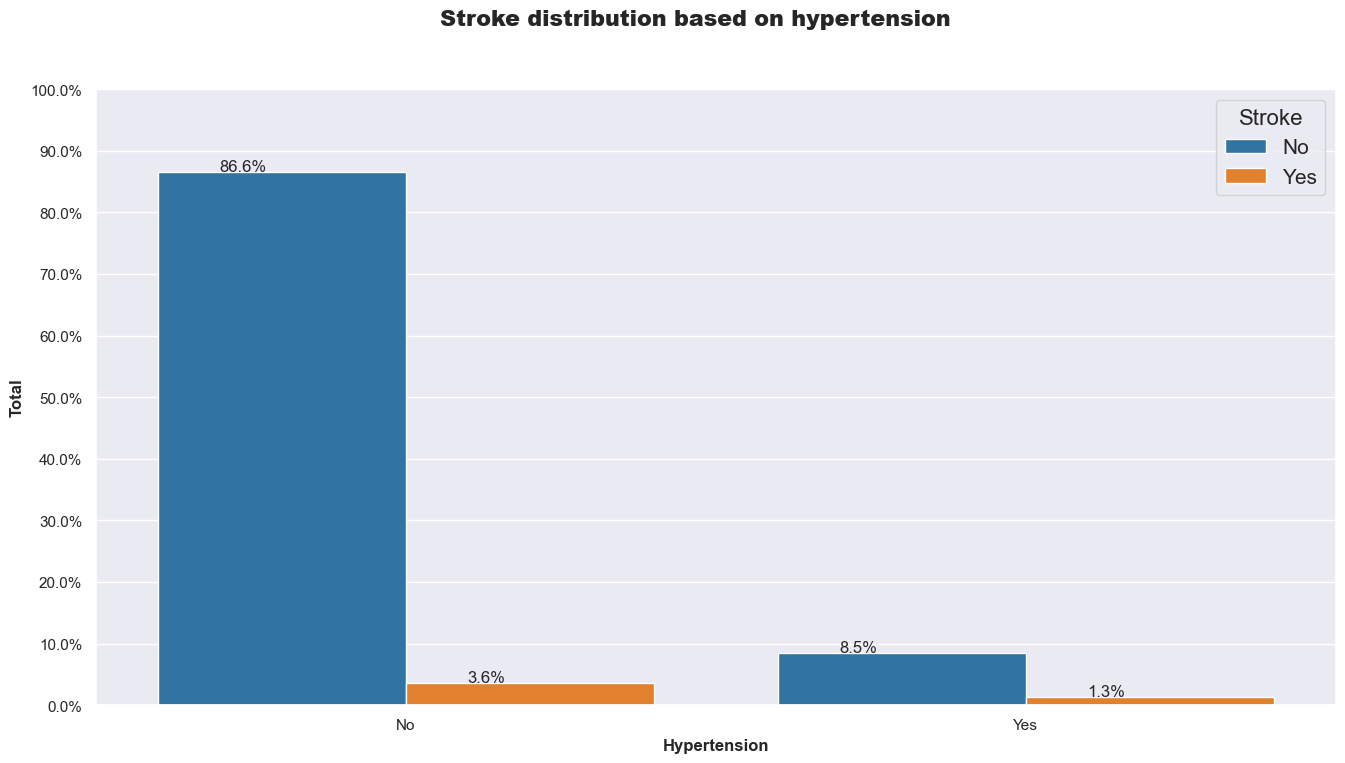

In [170]:
plt.figure(figsize=(16,8))

    ## Figure title
plt.suptitle("Stroke distribution based on hypertension", fontweight='heavy',fontsize='16', fontfamily='sans-serif')

    ## Count plot
ax=sns.countplot(data = df, x = "hypertension", hue = "stroke", palette = colors)
plt.xlabel("Hypertension", fontfamily='sans-serif', fontweight='bold')
plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
plt.xticks([0, 1],["No","Yes"])
plt.legend(title = "Stroke", labels= ["No","Yes"], fontsize='15',title_fontsize='16', frameon=True)
total = len(df)*1.
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))


plt.show()

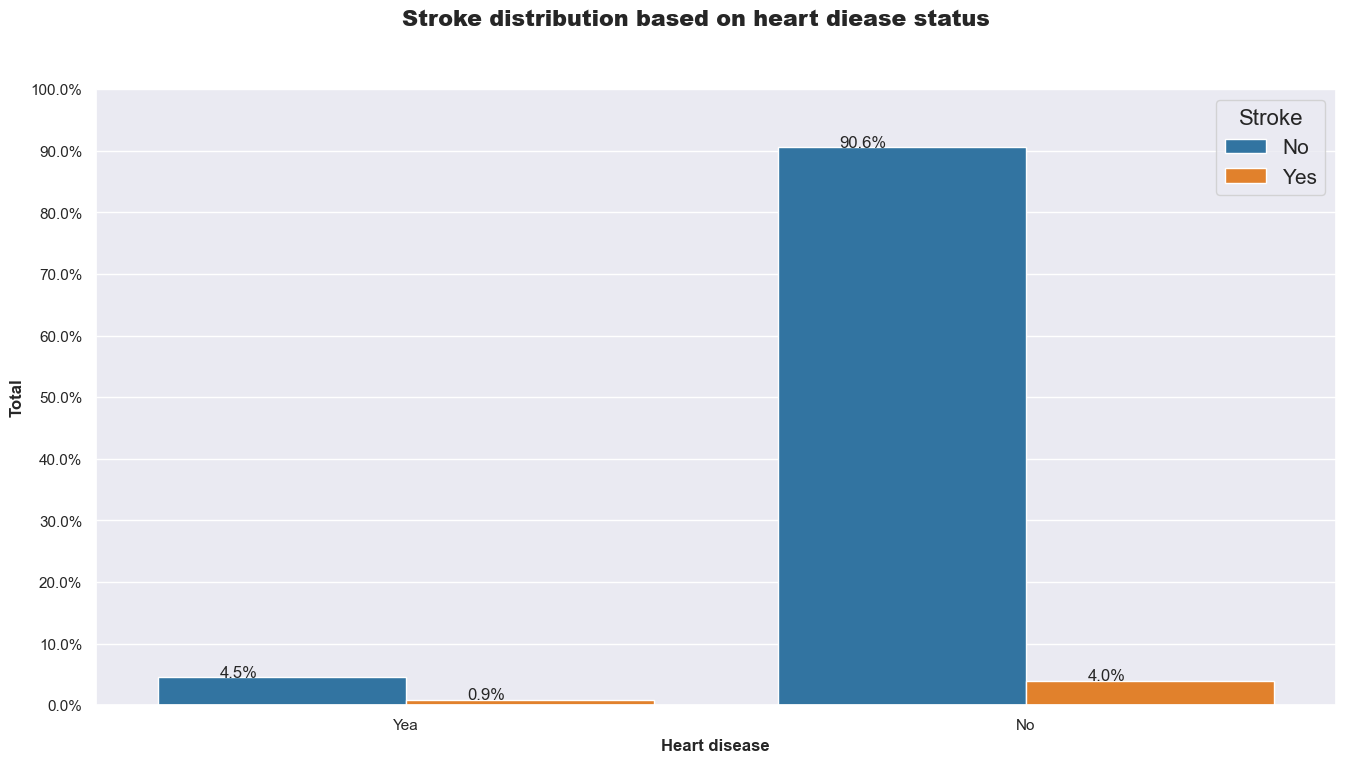

In [171]:
plt.figure(figsize=(16,8))

    ## Figure title
plt.suptitle("Stroke distribution based on heart diease status", fontweight='heavy',fontsize='16', fontfamily='sans-serif')

    ## Count plot
ax=sns.countplot(data = df, x = "heart_disease", hue = "stroke", palette = colors)
plt.xlabel("Heart disease", fontfamily='sans-serif', fontweight='bold')
plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
plt.xticks([0, 1],["Yea","No"])
plt.legend(title = "Stroke", labels= ["No","Yes"], fontsize='15',title_fontsize='16', frameon=True)
total = len(df)*1.
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

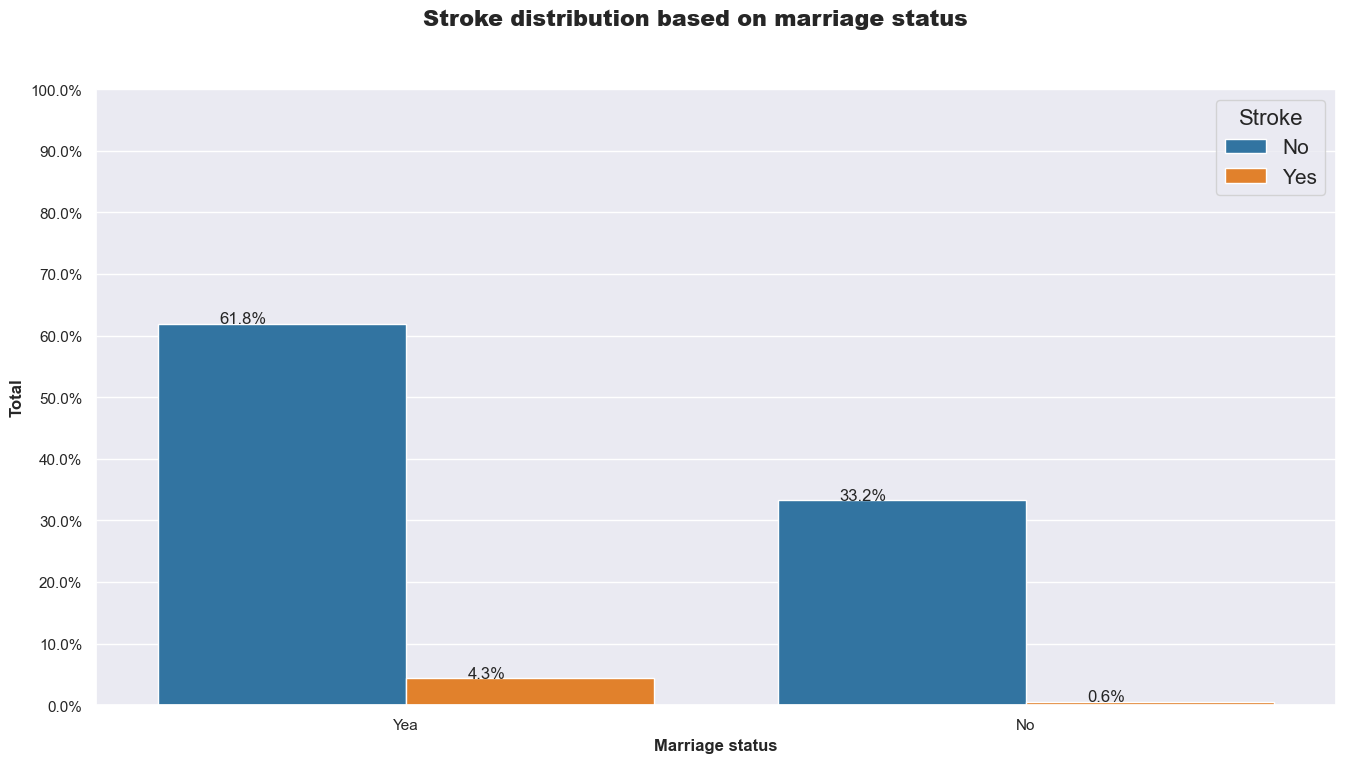

In [172]:
plt.figure(figsize=(16,8))

    ## Figure title
plt.suptitle("Stroke distribution based on marriage status", fontweight='heavy',fontsize='16', fontfamily='sans-serif')

    ## Count plot
ax=sns.countplot(data = df, x = "ever_married", hue = "stroke", palette = colors)
plt.xlabel("Marriage status", fontfamily='sans-serif', fontweight='bold')
plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
plt.xticks([0, 1],["Yea","No"])
plt.legend(title = "Stroke", labels= ["No","Yes"], fontsize='15',title_fontsize='16', frameon=True)
total = len(df)*1.
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

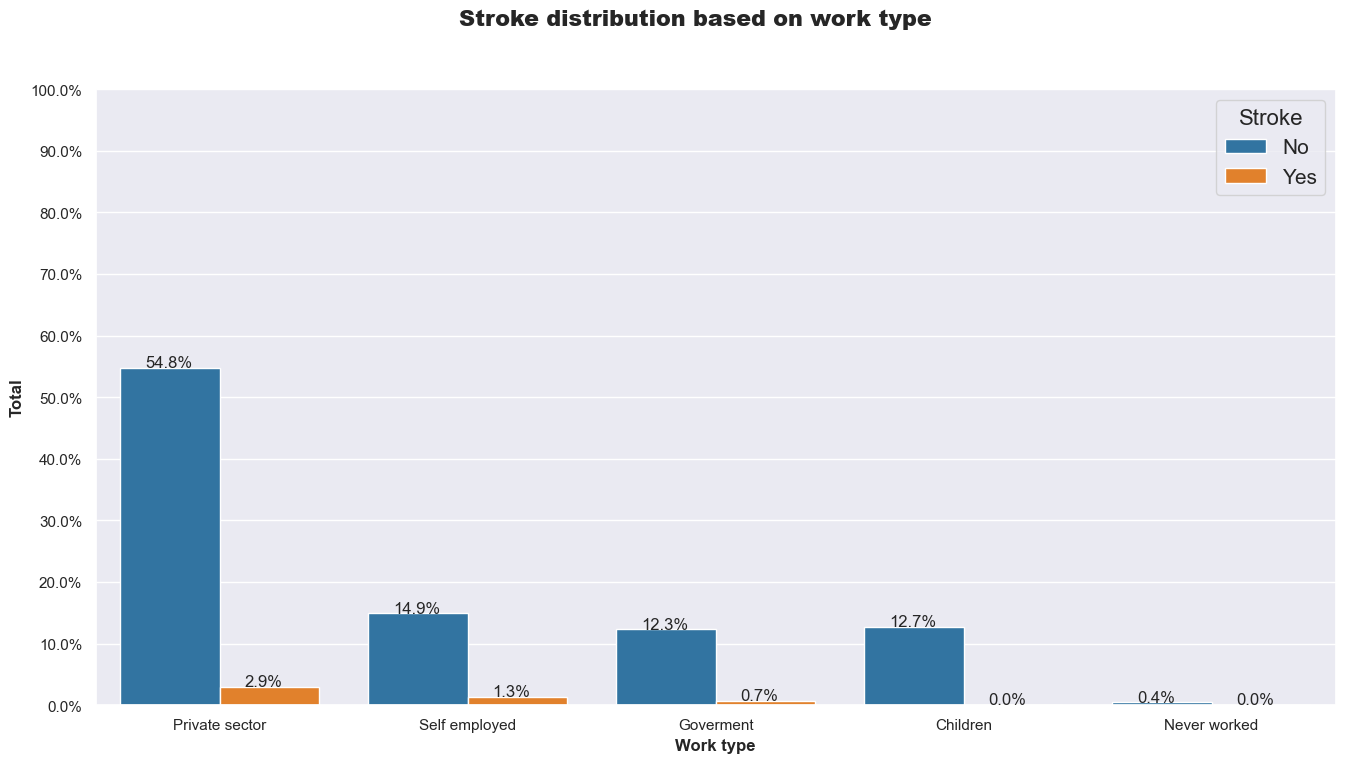

In [173]:
plt.figure(figsize=(16,8))

    ## Figure title
plt.suptitle("Stroke distribution based on work type", fontweight='heavy',fontsize='16', fontfamily='sans-serif')

    ## Count plot
ax=sns.countplot(data = df, x = "work_type", hue = "stroke", palette = colors)
plt.xlabel("Work type", fontfamily='sans-serif', fontweight='bold')
plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
plt.xticks([0, 1, 2, 3, 4],["Private sector","Self employed","Goverment","Children","Never worked"])
plt.legend(title = "Stroke", labels= ["No","Yes"], fontsize='15',title_fontsize='16', frameon=True)
total = len(df)*1.
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

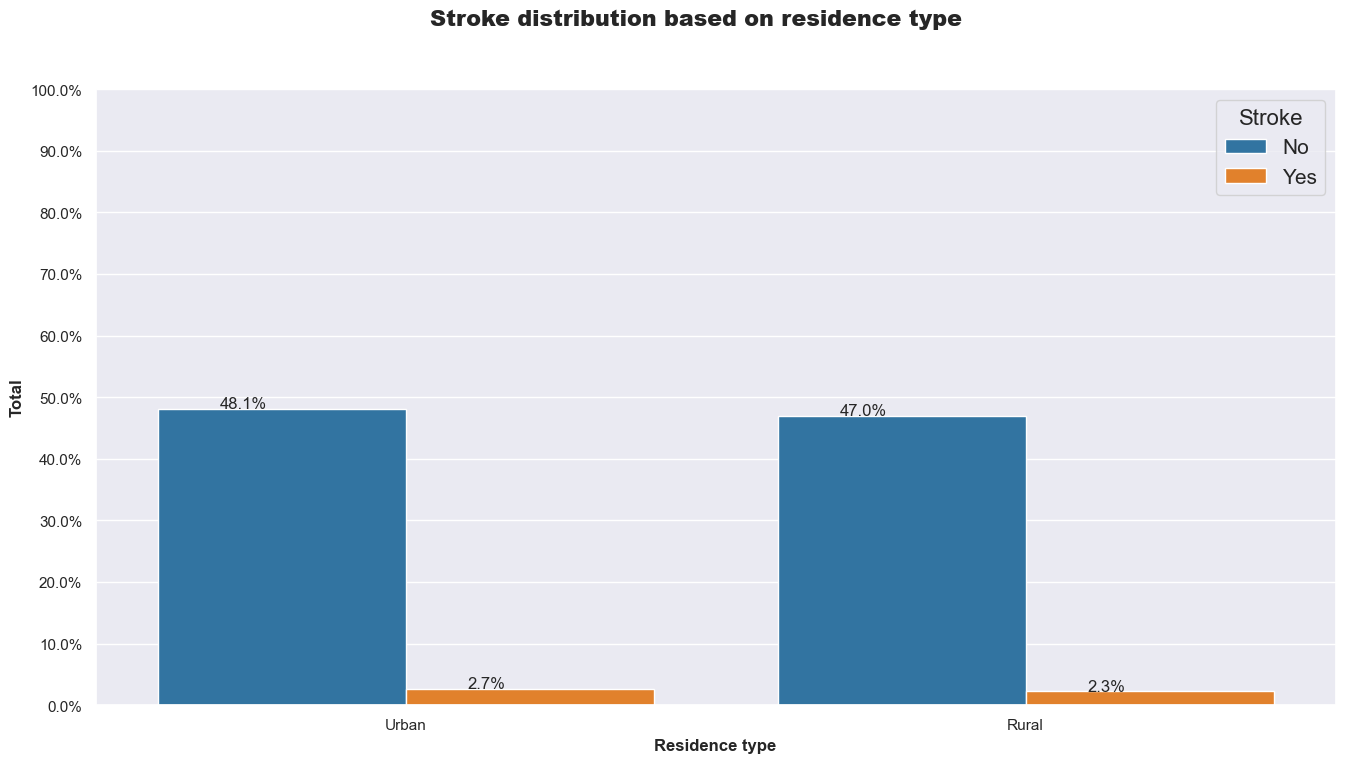

In [174]:
plt.figure(figsize=(16,8))

    ## Figure title
plt.suptitle("Stroke distribution based on residence type", fontweight='heavy',fontsize='16', fontfamily='sans-serif')

    ## Count plot
ax=sns.countplot(data = df, x = "Residence_type", hue = "stroke", palette = colors)
plt.xlabel("Residence type", fontfamily='sans-serif', fontweight='bold')
plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
plt.xticks([0, 1],["Urban","Rural"])
plt.legend(title = "Stroke", labels= ["No","Yes"], fontsize='15',title_fontsize='16', frameon=True)
total = len(df)*1.
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

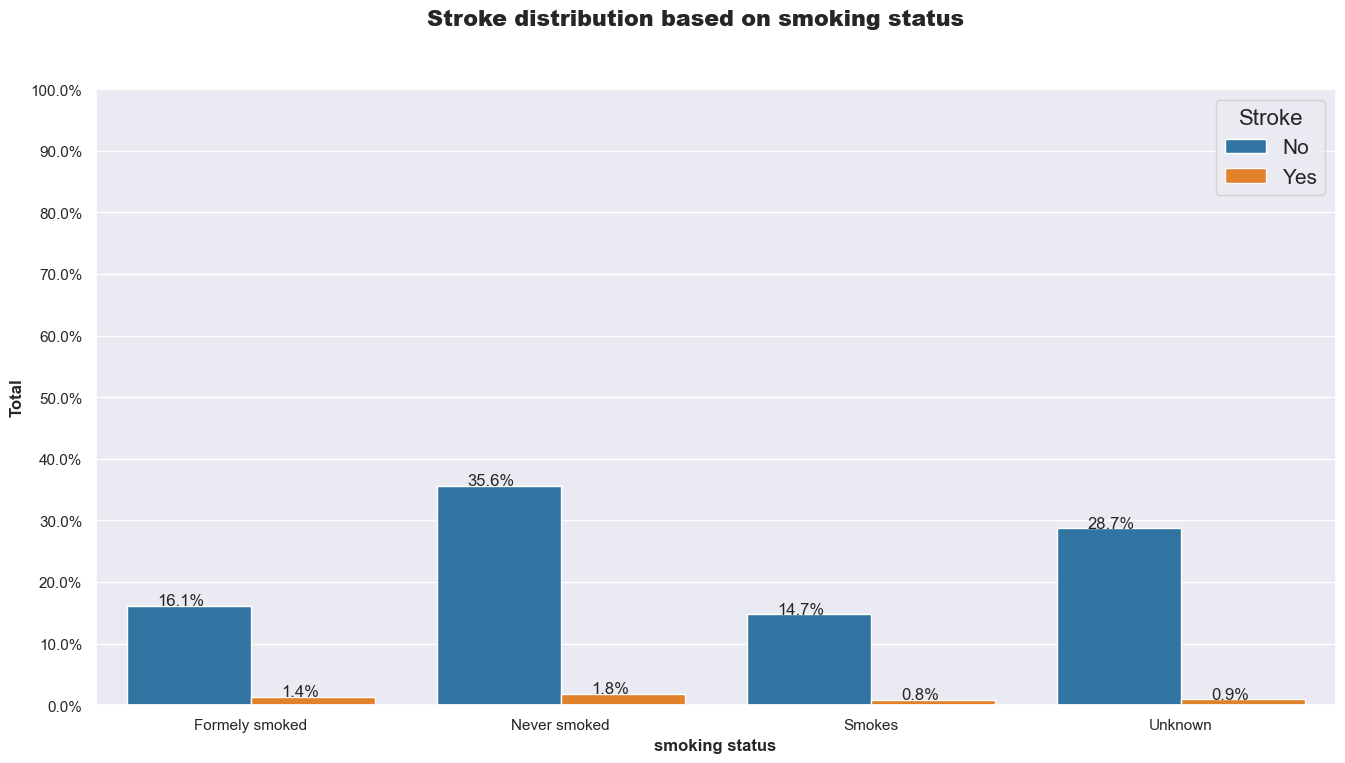

In [175]:
plt.figure(figsize=(16,8))

    ## Figure title
plt.suptitle("Stroke distribution based on smoking status", fontweight='heavy',fontsize='16', fontfamily='sans-serif')

    ## Count plot
ax=sns.countplot(data = df, x = "smoking_status", hue = "stroke", palette = colors)
plt.xlabel("smoking status", fontfamily='sans-serif', fontweight='bold')
plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
plt.xticks([0, 1, 2, 3],["Formely smoked","Never smoked","Smokes","Unknown"])
plt.legend(title = "Stroke", labels= ["No","Yes"], fontsize='15',title_fontsize='16', frameon=True)
total = len(df)*1.
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.show()

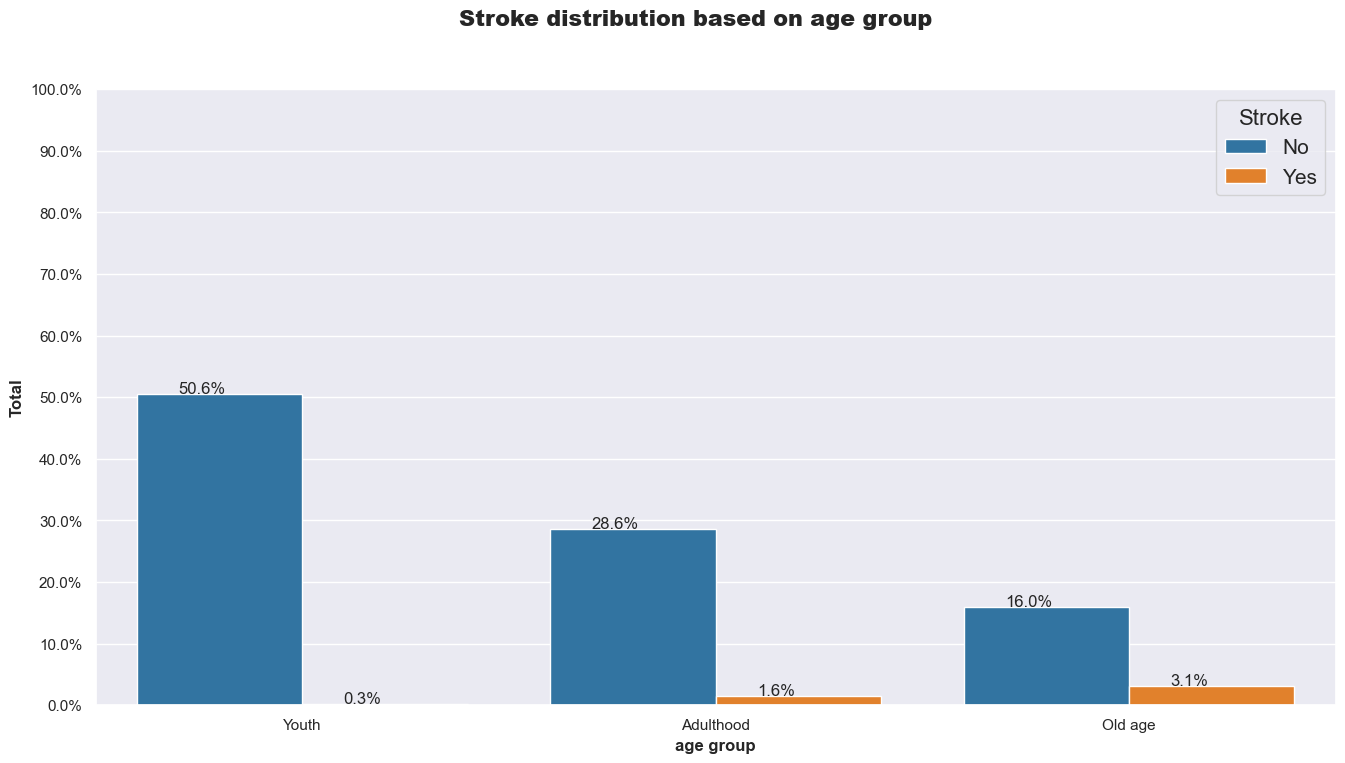

In [176]:
df['age_range'] = pd.cut(df['age'], bins=[0, 45, 65, np.Inf], labels=["Youth (0-45)", "Adulthood (46-65)", "Old Age (66+)"])
plt.figure(figsize=(16,8))

    ## Figure title
plt.suptitle("Stroke distribution based on age group", fontweight='heavy',fontsize='16', fontfamily='sans-serif')

    ## Count plot
ax=sns.countplot(data = df, x = "age_range", hue = "stroke", palette = colors)
plt.xlabel("age group", fontfamily='sans-serif', fontweight='bold')
plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
plt.xticks([0, 1, 2],["Youth","Adulthood","Old age"])
plt.legend(title = "Stroke", labels= ["No","Yes"], fontsize='15',title_fontsize='16', frameon=True)
total = len(df)*1.
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.show()


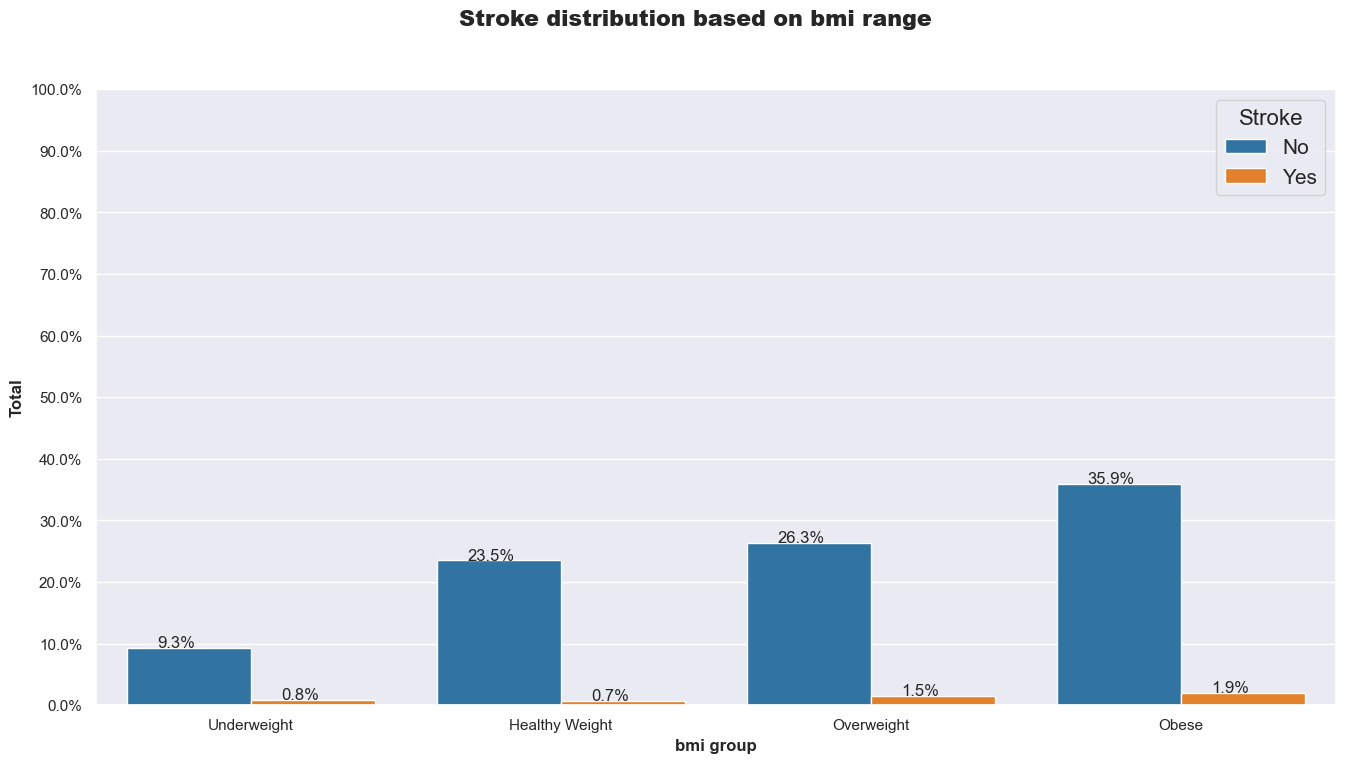

In [177]:
df['bmi_range'] = pd.cut(df['bmi'], bins=[-1, 18.4, 24.9, 29.9, np.Inf], labels=["Underweight", "Healthy Weight", "Overweight", "Obese"])
plt.figure(figsize=(16,8))

    ##Figure title
plt.suptitle("Stroke distribution based on bmi range", fontweight='heavy',fontsize='16', fontfamily='sans-serif')

    ## Count plot
ax = sns.countplot(data = df, x = "bmi_range", hue = "stroke", palette = colors)
plt.xlabel("bmi group", fontfamily='sans-serif', fontweight='bold')
plt.ylabel("Total", fontfamily='sans-serif', fontweight='bold')
plt.xticks([0, 1, 2,3],["Underweight", "Healthy Weight", "Overweight", "Obese"])
plt.legend(title = "Stroke", labels= ["No","Yes"], fontsize='15',title_fontsize='16', frameon=True)
total = len(df)*1.
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.show()




